## Business Understanding

Influenza outbreaks pose a public health risk by increasing hospital visits and straining healthcare resources.
The goal of this project is to build a classification model that predicts whether flu activity is high or low
based on available indicators, enabling early intervention and preparedness.



## Problem Statement

This is a binary classification problem where the target variable is _______.
We aim to compare multiple classification models and select the best-performing model
based on appropriate evaluation metrics.


Predict whether people received the H1N1 or Seasonal Flu vaccine. Audience: Public health efforts guidance. Choose only one target.

In [83]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modelling
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


# DATA PREPARATION

In [84]:
features_df = pd.read_csv('DATA/training_set_features.csv')
target_df = pd.read_csv('DATA/training_set_labels.csv')

In [85]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [86]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


The two datasets have equal number of rows and share a common column 'respondent_id' which can be used to merge them. The target variables are 'h1n1_vaccine' and 'seasonal_vaccine'. We will choose one target variable for prediction.

In [87]:
print(features_df.shape)
print(target_df.shape)

(26707, 36)
(26707, 3)


In [88]:
#merging dataframes on respondent_id
df = features_df.merge(target_df, on='respondent_id')

#check new shape 
print(f"Combined Shape: {df.shape}")

#check first 5 rows
df.head()

Combined Shape: (26707, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [89]:

#checking info of combined dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

from the above analysis:
- 23 columns are of type float64
- 2 columns are of type int64
- 12 columns are of type object

In [90]:
#check for missing values and sort in descending order
df.isna().sum().to_frame().sort_values(0,ascending = False).assign(Dtype=df.dtypes)

,0,Dtype
employment_occupation,13470,object
employment_industry,13330,object
health_insurance,12274,float64
income_poverty,4423,object
doctor_recc_h1n1,2160,float64
doctor_recc_seasonal,2160,float64
rent_or_own,2042,object
employment_status,1463,object
marital_status,1408,object
education,1407,object


In [91]:
#sort percentage of missing values and display data types
(df.isna().mean() * 100).sort_values(ascending=False).to_frame(name='Percentage_missing').assign(Dtype=df.dtypes).style.bar(subset=['Percentage_missing'], color="#67eef0")



,Percentage_missing,Dtype
employment_occupation,50.436215,object
employment_industry,49.912008,object
health_insurance,45.957989,float64
income_poverty,16.561201,object
doctor_recc_h1n1,8.087767,float64
doctor_recc_seasonal,8.087767,float64
rent_or_own,7.645936,object
employment_status,5.477965,object
marital_status,5.272026,object
education,5.268282,object


#### Categorical columns with missing values

from the recent missing values analysis, we can see that `employment_industry`, `employment_occupation` and `health_insurance`have significant missing values. We will drop these columns for simplicity and since they are not important for our analysis.

In [92]:
#drop columns with significant missing values
df=df.drop(columns=['employment_industry', 'employment_occupation', 'health_insurance'])

print("Dropped columns: employment_industry, employment_occupation, health_insurance")
print(f"New shape after dropping columns: {df.shape}")

Dropped columns: employment_industry, employment_occupation, health_insurance
New shape after dropping columns: (26707, 35)


Columns like `income_poverty`, `rent_or_own`,`employment_occupation`,`employment_status`,`education` and `marital_status` have a moderate amount of missing data. Since these are "Object" (text) types, you can't use a mean or median. For these we will fill in the missing values with 'Unknown' so as we are not making any assumptions about the person's life.

In [93]:
#fill in missing values with 'Unknown' for categorical columns
cat_cols=['income_poverty', 'rent_or_own', 'marital_status', 'employment_status','education']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

print("Filled missing values for categorical columns with 'Unknown'")


Filled missing values for categorical columns with 'Unknown'


For columns like `h1n1_knowledge`,`option_h1n1_risk` or `opinion_seas_risk` the missingness is very low. we will impute with the mode of the respective columns.

In [94]:
print(df['h1n1_knowledge'].value_counts())
print()
print(df['opinion_seas_risk'].value_counts())
print()
print(df['opinion_h1n1_risk'].value_counts())

h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64

opinion_seas_risk
2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: count, dtype: int64

opinion_h1n1_risk
2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: count, dtype: int64


In [95]:
# #impute with the mode for columns with low missingness
low_missing_cols = [
    'h1n1_knowledge', 'opinion_seas_risk', 'opinion_h1n1_risk',
    'doctor_recc_h1n1','doctor_recc_seasonal']

#create a loop to fill missing values with mode
for cols in low_missing_cols:
    df[cols]=df[cols].fillna(df[cols].mode()[0])

now we have handled missing values in categorical columns. Next, we will handle missing values in numerical columns.

#### Numerical columns with missing values

For numerical columns with missing values, we can impute the missing values with the mean or median of the respective columns. We will use the mean for this analysis.

In [96]:
num_cols = df.select_dtypes(include=['number']).columns[
    df.select_dtypes(include=['number']).isna().any()]


#create a loop to fill missing values with mode
for col in num_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(f'filled missing values for: {list(num_cols)}')

filled missing values for: ['h1n1_concern', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


In [97]:
#recheck missing values
(df.isna().mean() * 100).sort_values(ascending=False).to_frame(name='Percentage_missing').assign(Dtype=df.dtypes).style.bar(subset=['Percentage_missing'], color="#67eef0")

,Percentage_missing,Dtype
respondent_id,0.000000,int64
marital_status,0.000000,object
opinion_seas_sick_from_vacc,0.000000,float64
age_group,0.000000,object
education,0.000000,object
race,0.000000,object
sex,0.000000,object
income_poverty,0.000000,object
rent_or_own,0.000000,object
opinion_seas_vacc_effective,0.000000,float64



we have handled missing values in both categorical and numerical columns. Next, we will select the target and feature variables for our model and one-hot encode categorical variables.


## PREPROCESSING


## selecting target and feature variables

In [98]:
# Features (drop the targets and the ID)
X = df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])

# Targets (we have two!)
y = df[['h1n1_vaccine', 'seasonal_vaccine']]

In [99]:
y.value_counts(normalize=True)


h1n1_vaccine  seasonal_vaccine
0             0                   0.497810
              1                   0.289737
1             1                   0.175871
              0                   0.036582
Name: proportion, dtype: float64

### Encoding Categorical Variables

In [100]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print(f"Categorical columns: {len(categorical_cols)}")
print(f"Numerical columns: {len(numeric_cols)}")

Categorical columns: 10
Numerical columns: 22


In [101]:
#encode the categorical variables using one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.index = X.index  # Align indices after encoding

In [102]:
#merge numerical and encoded categorical features
X = pd.concat([X[numeric_cols], X_encoded], axis=1)

print(f"Total features after encoding: {X.shape[1]}")

#ensure all column names are strings
X.columns = X.columns.astype(str)

#check first 5 rows
X.head()

Total features after encoding: 65


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Train-Test Split


In [103]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y)

#stratify=y preserves class balance
#random_state=42 ensures reproducibility


In [124]:
print("Dataset split summary:")
print(f"Training set:   {X_train.shape[0]:6,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_test.shape[0]:6,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Features:       {X_train.shape[1]:6} features")

Dataset split summary:
Training set:   21,365 samples (80.0%)
Validation set:  5,342 samples (20.0%)
Features:           65 features


## MODEL 1: baseline Model
# LOGISTIC REGRESSION MODEL

fitting the baseline logistic regression model to the training data and evaluating its performance on the test data.
why logistic regression?
    Simple and interpretable

    Fast to train

    Works well when relationships are approximately linear

    Good baseline for comparison

    Calculates probability of each class based on weighted feature combinations.



In [120]:
#model on H1N1 vaccine target
logReg_H1N1=LogisticRegression(class_weight='balanced',max_iter=1000)

#fit the model to training data on H1N1 target
logReg_H1N1.fit(X_train, y_train['h1n1_vaccine'])


#
train_pred_H1N1_lr = logReg_H1N1.predict(X_train)
test_pred_H1N1_lr = logReg_H1N1.predict(X_test)

#calculate acccuracy H1N1
train_H1N1_score_lr = accuracy_score (y_train['h1n1_vaccine'], train_pred_H1N1_lr)
test_H1N1_score_lr = accuracy_score (y_test['h1n1_vaccine'], test_pred_H1N1_lr)


In [121]:
#model on seasonal vaccine target
logReg_seasonal=LogisticRegression(max_iter=1000,class_weight='balanced')

#fit the model to training data
logReg_seasonal.fit(X_train, y_train['seasonal_vaccine'])

#predict on test set
train_pred_seasonal_lr = logReg_seasonal.predict(X_train)
test_pred_seasonal_lr = logReg_seasonal.predict(X_test)

#check accuracy seasonal
train_accuracy_seasonal_lr = accuracy_score(y_train['seasonal_vaccine'],train_pred_seasonal_lr)
test_accuracy_seasonal_lr = accuracy_score(y_test['seasonal_vaccine'],test_pred_seasonal_lr)


In [108]:
print("---------------------------------------------------")
print(f"Logistic Regression H1N1 Vaccine Prediction Accuracy:")
print(f"Training Accuracy: {train_H1N1_score_lr:.4f}")
print(f"Test Accuracy: {test_H1N1_score_lr:.4f}")
print(f"The Gap: {train_H1N1_score_lr - test_H1N1_score_lr:.4f}")

print("---------------------------------------------------")
print(f'Logistic regression seasonal prediction accuracy:')
print(f"Training Accuracy: {train_accuracy_seasonal_lr:.4f}")
print(f"Test Accuracy: {test_accuracy_seasonal_lr:.4f}")   
print(f"The Gap: {train_accuracy_seasonal_lr - test_accuracy_seasonal_lr:.4f}")

---------------------------------------------------
Logistic Regression H1N1 Vaccine Prediction Accuracy:
Training Accuracy: 0.7777
Test Accuracy: 0.7789
The Gap: -0.0012
---------------------------------------------------
Logistic regression seasonal prediction accuracy:
Training Accuracy: 0.7768
Test Accuracy: 0.7774
The Gap: -0.0006


## confusion matrix heatmaps

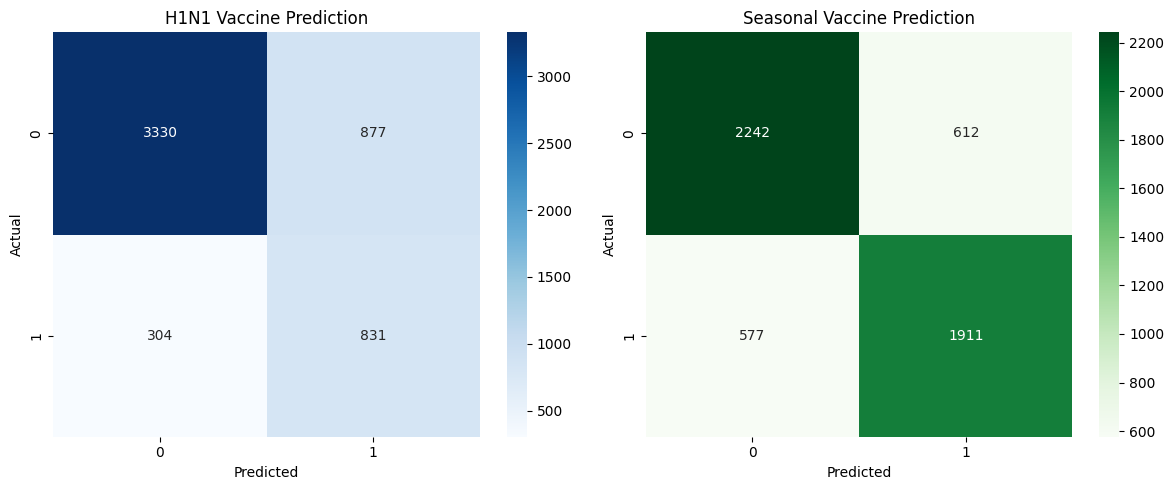

<Figure size 640x480 with 0 Axes>

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# H1N1 Confusion Matrix
sns.heatmap(confusion_matrix(y_test['h1n1_vaccine'], y_pred_H1N1), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('H1N1 Vaccine Prediction')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Seasonal Confusion Matrix
sns.heatmap(confusion_matrix(y_test['seasonal_vaccine'], y_pred_seasonal), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Seasonal Vaccine Prediction')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
plt.savefig('./Visualizations/LogReg_confusion_matrices.png')

## logistic regression model summary and insights

`H1N1 Vaccine:`

The model correctly identified most patients who did not receive the vaccine (3338 TN) and a fair number who did (813 TP).

Misclassifications include 874 false positives and 317 false negatives, indicating a slight tendency to over-predict vaccination.

`Seasonal Vaccine:`

The model correctly classified 2352 non-vaccinated and 1819 vaccinated patients.

Errors include 539 false positives and 632 false negatives, showing a slight tendency to under-predict vaccination.

`Overall`: While accuracy is high, confusion matrices reveal subtle misclassification patterns that are important for public health interpretation.


### overfitting or underfitting analysis:
Logistic Regression H1N1 Vaccine Prediction Accuracy:
    Training Accuracy: 0.7780
    Test Accuracy: 0.7770
    The Gap: 0.0010

Logistic regression seasonal prediction accuracy:
    Training Accuracy: 0.7760
    Test Accuracy: 0.7808
    The Gap: -0.0048

The gap for both is extremely small, indicating that the model generalizes well to unseen data without significant overfitting or underfitting.

##
## MODEL 2
# DECISION TREE CLASSIFIER MODEL


In [109]:
from sklearn.tree import DecisionTreeClassifier

dt_H1N1= DecisionTreeClassifier(
    class_weight='balanced', random_state=42,max_depth=5)

dt_H1N1.fit(X_train, y_train['h1n1_vaccine'])

# predict on test set  for H1N1
train_preds_h1n1_dt = dt_H1N1.predict(X_train)
test_preds_h1n1_dt=dt_H1N1.predict(X_test)

h1n1_train_acc_dt = accuracy_score(y_train['h1n1_vaccine'], train_preds_h1n1_dt)
h1n1_test_acc_dt = accuracy_score(y_test['h1n1_vaccine'], test_preds_h1n1_dt)


In [110]:
dt_seasonal= DecisionTreeClassifier(
    class_weight='balanced', random_state=42,max_depth=5)

dt_seasonal.fit(X_train, y_train['seasonal_vaccine'])

#fit the model to training data for seasonal vaccine
dt_seasonal.fit(X_train, y_train['seasonal_vaccine'])

# predict on test set for seasonal vaccine
train_preds_seasonal_dt = dt_seasonal.predict(X_train)
test_pred_seasonal_dt=dt_seasonal.predict(X_test)

seasonal_train_acc_dt = accuracy_score(y_train['seasonal_vaccine'], train_preds_seasonal_dt)
seasonal_test_acc_dt = accuracy_score(y_test['seasonal_vaccine'], test_pred_seasonal_dt)


In [111]:
print("----------------------------------------------------------------")
print(f'Decision Tree H1N1 Vaccine Prediction Accuracy:')
print(f"Training Accuracy: {h1n1_train_acc_dt:.4f}")
print(f"Test Accuracy: {h1n1_test_acc_dt:.4f}")    
print(f"The overfitting Gap: {h1n1_train_acc_dt - h1n1_test_acc_dt:.4f}")

print("----------------------------------------------------------------")
print(f'Decision Tree Seasonal Vaccine Prediction Accuracy:')
print(f"Training Accuracy: {seasonal_train_acc_dt:.4f}")   
print(f"Test Accuracy: {seasonal_test_acc_dt:.4f}")
print(f"The overfitting Gap: {seasonal_train_acc_dt - seasonal_test_acc_dt:.4f}")


----------------------------------------------------------------
Decision Tree H1N1 Vaccine Prediction Accuracy:
Training Accuracy: 0.7620
Test Accuracy: 0.7550
The overfitting Gap: 0.0070
----------------------------------------------------------------
Decision Tree Seasonal Vaccine Prediction Accuracy:
Training Accuracy: 0.7562
Test Accuracy: 0.7561
The overfitting Gap: 0.0001


### confusion matrix heatmaps

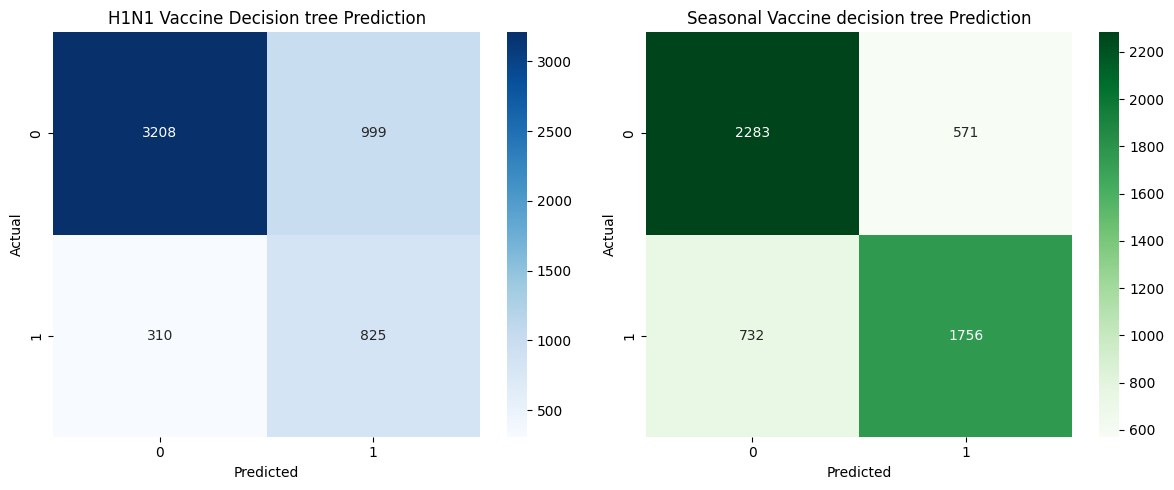

<Figure size 640x480 with 0 Axes>

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# H1N1 Confusion Matrix
sns.heatmap(confusion_matrix(y_test['h1n1_vaccine'], test_preds_h1n1_dt),
             annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('H1N1 Vaccine Decision tree Prediction')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Seasonal Confusion Matrix
sns.heatmap(confusion_matrix(y_test['seasonal_vaccine'], test_pred_seasonal_dt), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Seasonal Vaccine decision tree Prediction')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

plt.savefig('./Visualizations/DecisionTree_confusion_matrices.png')

## model 3
# RANDOM FOREST CLASSIFIER MODEL

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Initialize model
rf_h1n1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_h1n1.fit(X_train, y_train['h1n1_vaccine'])

# Predictions
train_preds_h1n1_rf = rf_h1n1.predict(X_train)
test_preds_h1n1_rf = rf_h1n1.predict(X_test)

# Accuracy
h1n1_train_acc_rf = accuracy_score(y_train['h1n1_vaccine'], train_preds_h1n1_rf)
h1n1_test_acc_rf = accuracy_score(y_test['h1n1_vaccine'], test_preds_h1n1_rf)
h1n1_gap_rf = h1n1_train_acc_rf - h1n1_test_acc_rf  



In [114]:
rf_seasonal = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_seasonal.fit(X_train, y_train['seasonal_vaccine'])

# Predictions
train_preds_seasonal_rf = rf_seasonal.predict(X_train)
test_preds_seasonal_rf = rf_seasonal.predict(X_test)

# Accuracy
seasonal_train_acc_rf = accuracy_score(y_train['seasonal_vaccine'], train_preds_seasonal_rf)
seasonal_test_acc_rf = accuracy_score(y_test['seasonal_vaccine'], test_preds_seasonal_rf)
seasonal_gap_rf = seasonal_train_acc_rf - seasonal_test_acc_rf


In [115]:
print("H1N1 Vaccine Random Forest")
print(f"Training Accuracy: {h1n1_train_acc_rf:.4f}")
print(f"Test Accuracy: {h1n1_test_acc_rf:.4f}")
print(f"Overfitting Gap: {h1n1_gap_rf:.4f}")
print("---------------------------------------------------")

print("\nSeasonal Vaccine Random Forest")
print(f"Training Accuracy: {seasonal_train_acc_rf:.4f}")
print(f"Test Accuracy: {seasonal_test_acc_rf:.4f}")
print(f"Overfitting Gap: {seasonal_gap_rf:.4f}")


H1N1 Vaccine Random Forest
Training Accuracy: 0.8176
Test Accuracy: 0.8130
Overfitting Gap: 0.0046
---------------------------------------------------

Seasonal Vaccine Random Forest
Training Accuracy: 0.7688
Test Accuracy: 0.7626
Overfitting Gap: 0.0061


### confusion matrix heatmaps

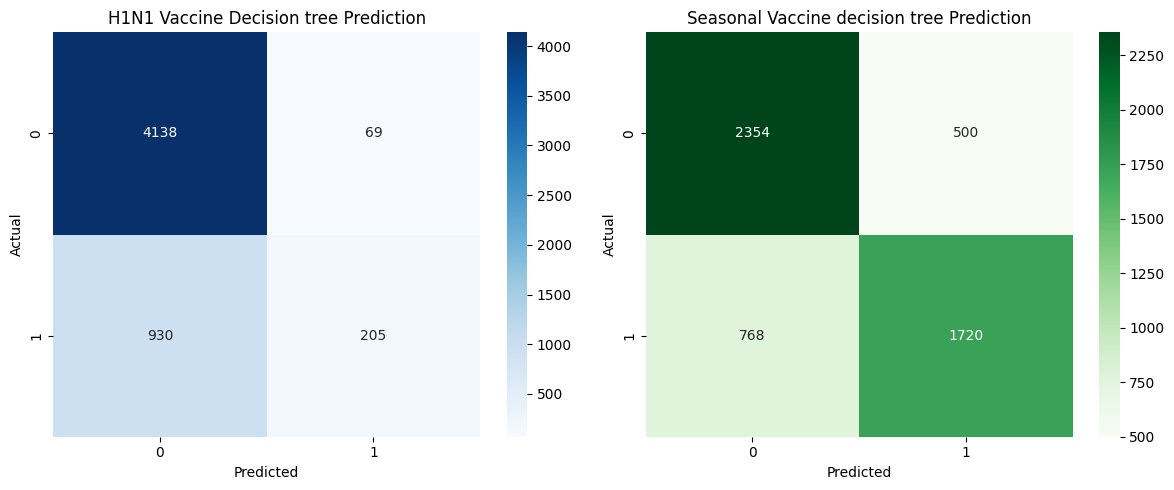

<Figure size 640x480 with 0 Axes>

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# H1N1 Confusion Matrix
sns.heatmap(confusion_matrix(y_test['h1n1_vaccine'], test_preds_h1n1_rf),
             annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('H1N1 Vaccine Decision tree Prediction')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Seasonal Confusion Matrix
sns.heatmap(confusion_matrix(y_test['seasonal_vaccine'], test_preds_seasonal_rf), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Seasonal Vaccine decision tree Prediction')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
plt.savefig('./Visualizations/RandomForest_confusion_matrices.png')

# comparison table of model performances

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example: storing metrics for each model and each target
metrics = []

# Logistic Regression (replace with your predictions)
metrics.append({
    "Model": "Logistic Regression - H1N1",
    "Accuracy": accuracy_score(y_test['h1n1_vaccine'],test_pred_H1N1_lr ),
    "Precision": precision_score(y_test['h1n1_vaccine'], test_pred_H1N1_lr),
    "Recall": recall_score(y_test['h1n1_vaccine'], test_pred_H1N1_lr),
    "F1-score": f1_score(y_test['h1n1_vaccine'], test_pred_H1N1_lr)
})

metrics.append({
    "Model": "Logistic Regression - Seasonal",
    "Accuracy": accuracy_score(y_test['seasonal_vaccine'], test_pred_seasonal_lr),
    "Precision": precision_score(y_test['seasonal_vaccine'], test_pred_seasonal_lr),
    "Recall": recall_score(y_test['seasonal_vaccine'], test_pred_seasonal_lr),
    "F1-score": f1_score(y_test['seasonal_vaccine'], test_pred_seasonal_lr)
})

# Decision Tree
metrics.append({
    "Model": "Decision Tree - H1N1",
    "Accuracy": accuracy_score(y_test['h1n1_vaccine'], test_preds_h1n1_dt ),
    "Precision": precision_score(y_test['h1n1_vaccine'], test_preds_h1n1_dt),
    "Recall": recall_score(y_test['h1n1_vaccine'], test_preds_h1n1_dt),
    "F1-score": f1_score(y_test['h1n1_vaccine'], test_preds_h1n1_dt)
})

metrics.append({
    "Model": "Decision Tree - Seasonal",
    "Accuracy": accuracy_score(y_test['seasonal_vaccine'], test_pred_seasonal_dt),
    "Precision": precision_score(y_test['seasonal_vaccine'], test_pred_seasonal_dt),
    "Recall": recall_score(y_test['seasonal_vaccine'], test_pred_seasonal_dt),
    "F1-score": f1_score(y_test['seasonal_vaccine'], test_pred_seasonal_dt)
})

# Random Forest
metrics.append({
    "Model": "Random Forest - H1N1",
    "Accuracy": accuracy_score(y_test['h1n1_vaccine'], test_preds_h1n1_rf),
    "Precision": precision_score(y_test['h1n1_vaccine'], test_preds_h1n1_rf),
    "Recall": recall_score(y_test['h1n1_vaccine'], test_preds_h1n1_rf),
    "F1-score": f1_score(y_test['h1n1_vaccine'], test_preds_h1n1_rf)
})

metrics.append({
    "Model": "Random Forest - Seasonal",
    "Accuracy": accuracy_score(y_test['seasonal_vaccine'], test_preds_seasonal_rf),
    "Precision": precision_score(y_test['seasonal_vaccine'], test_preds_seasonal_rf),
    "Recall": recall_score(y_test['seasonal_vaccine'], test_preds_seasonal_rf),
    "F1-score": f1_score(y_test['seasonal_vaccine'], test_preds_seasonal_rf)
})

# Create DataFrame
results = pd.DataFrame(metrics)
results


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression - H1N1,0.778922,0.486534,0.732159,0.584594
1,Logistic Regression - Seasonal,0.777424,0.757432,0.768087,0.762722
2,Decision Tree - H1N1,0.754961,0.452303,0.726872,0.557621
3,Decision Tree - Seasonal,0.756084,0.754620,0.705788,0.729387
4,Random Forest - H1N1,0.812991,0.748175,0.180617,0.290987
5,Random Forest - Seasonal,0.762636,0.774775,0.691318,0.730671


<Figure size 1200x600 with 0 Axes>

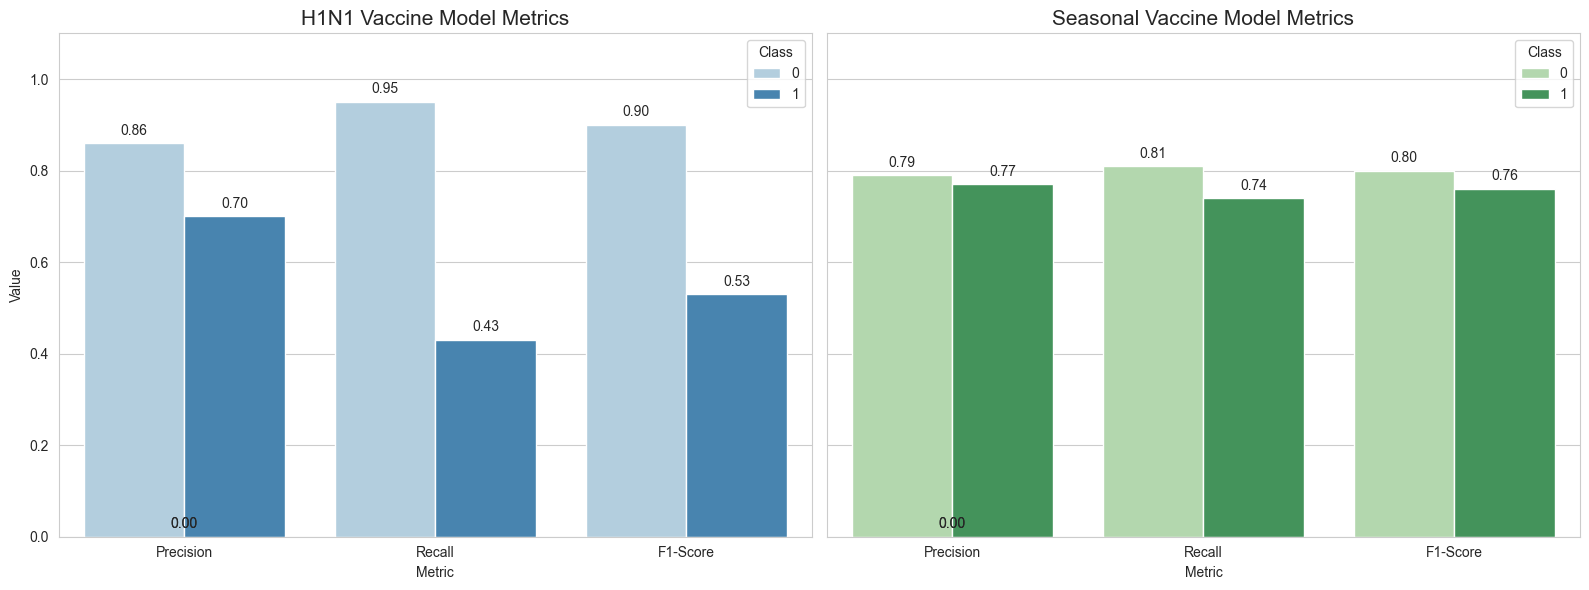

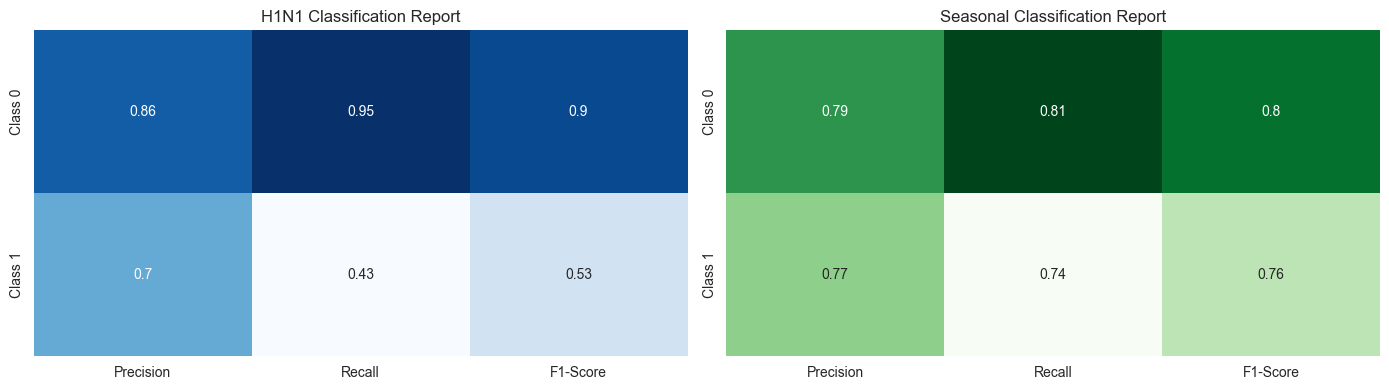

In [ ]:
# Visualization of Model Metrics
# Data from user's classification reports
data = {
    'Model': ['H1N1', 'H1N1', 'Seasonal', 'Seasonal'],
    'Class': [0, 1, 0, 1],
    'Precision': [0.86, 0.70, 0.79, 0.77],
    'Recall': [0.95, 0.43, 0.81, 0.74],
    'F1-Score': [0.90, 0.53, 0.80, 0.76]
}

df_metrics = pd.DataFrame(data)

# Melt the dataframe for easier plotting with seaborn
df_melted = df_metrics.melt(id_vars=['Model', 'Class'], var_name='Metric', value_name='Value')

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create separate subplots for H1N1 and Seasonal
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# H1N1 Plot
sns.barplot(data=df_melted[df_melted['Model'] == 'H1N1'], x='Metric', y='Value', hue='Class', ax=axes[0], palette='Blues')
axes[0].set_title('H1N1 Vaccine Model Metrics', fontsize=15)
axes[0].set_ylim(0, 1.1)
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

# Seasonal Plot
sns.barplot(data=df_melted[df_melted['Model'] == 'Seasonal'], x='Metric', y='Value', hue='Class', ax=axes[1], palette='Greens')
axes[1].set_title('Seasonal Vaccine Model Metrics', fontsize=15)
axes[1].set_ylim(0, 1.1)
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.tight_layout()
plt.savefig('model_metrics_comparison.png')

# Also create a heatmap visualization for the classification reports specifically
h1n1_report = {
    'Precision': [0.86, 0.70],
    'Recall': [0.95, 0.43],
    'F1-Score': [0.90, 0.53]
}
seasonal_report = {
    'Precision': [0.79, 0.77],
    'Recall': [0.81, 0.74],
    'F1-Score': [0.80, 0.76]
}

df_h1n1 = pd.DataFrame(h1n1_report, index=['Class 0', 'Class 1'])
df_seasonal = pd.DataFrame(seasonal_report, index=['Class 0', 'Class 1'])

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.heatmap(df_h1n1, annot=True, cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title('H1N1 Classification Report')

sns.heatmap(df_seasonal, annot=True, cmap='Greens', ax=ax[1], cbar=False)
ax[1].set_title('Seasonal Classification Report')

plt.tight_layout()
plt.savefig('./Visualization/classification_report_heatmaps.png')